# Practical Assignment 4
Dennis Verheijden, s4455770 and Joost Besseling, s4796799

In [45]:
%matplotlib inline

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def show_image(X, i):
	""" a function that shows an image"""
	plt.imshow(np.reshape(X[i], newshape=[28, 28]).transpose())
	plt.show()

In [47]:
def split_data(x, y, test_size=0.2, shuffle=True):
	""" a function that splits the data"""
	x_6 = x[0:50]
	x_9 = x[50:100]
	y_6 = y[0:50]
	y_9 = y[50:100]

	x_6_train, x_6_test, y_6_train, y_6_test = train_test_split(x_6, y_6, test_size=test_size, shuffle=shuffle)
	x_9_train, x_9_test, y_9_train, y_9_test = train_test_split(x_9, y_9, test_size=test_size, shuffle=shuffle)

	x_train = np.vstack((x_6_train, x_9_train))
	x_test = np.vstack((x_6_test, x_9_test))
	y_test = np.vstack((y_6_test, y_9_test))
	y_train = np.vstack((y_6_train, y_9_train))

	return x_train, x_test, y_train, y_test


In [48]:
def handcrafted_norm(X):
	"""
		A function that normalizes X, and returns the mean and standard deviation, 
		So we can denormalize the data later on
	"""
	mean = np.mean(X, axis=0)
	std = np.std(X - mean, axis=0)
	return [np.nan_to_num((X - mean) / std), mean, std]

In [49]:
def exercise_1(plot=False):
	raw = loadmat("69dataset.mat")

	Y = raw['Y']
	X = raw['X']

	# normalize the data using sklearn
	[X, X_mean, X_std] = handcrafted_norm(X)
	[Y, _, _] = handcrafted_norm(Y)

	X_train, X_test, Y_train, Y_test = split_data(X, Y, shuffle=False)

	# perform RidgeRegression with λ = 10^-6
	reg = Ridge(alpha=10**-6)
	reg.fit(Y_train, X_train)

	# predict the x's
	X_pred = reg.predict(Y_test)
	
	# normalize the data for better plotting
	X_pred = (X_pred * X_std) + X_mean
	X_test = (X_test * X_std) + X_mean

	if plot:
		for i in range(20):
			show_image(X_pred, i)
	
	return X_test, X_pred


/home/joost/anaconda3/envs/numpy/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


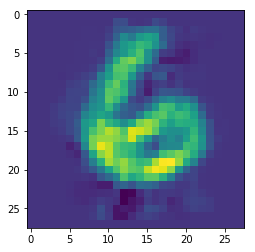

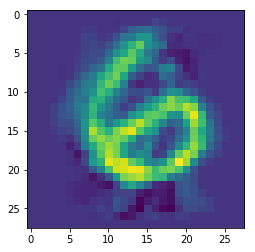

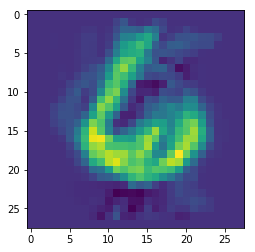

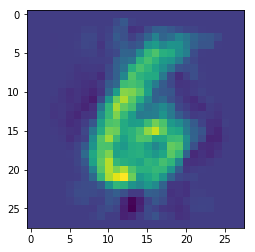

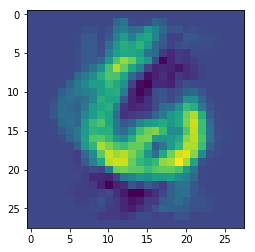

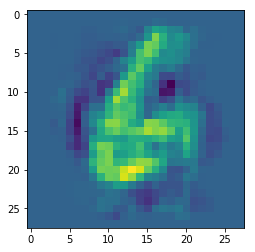

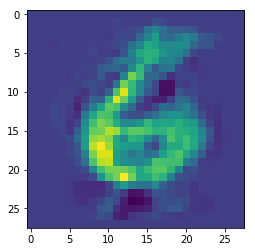

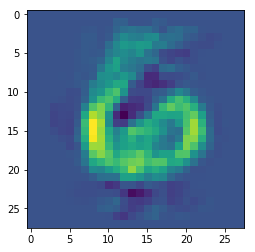

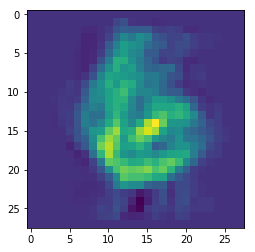

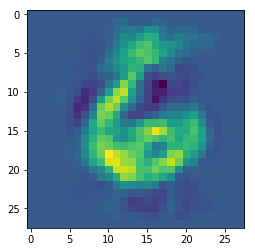

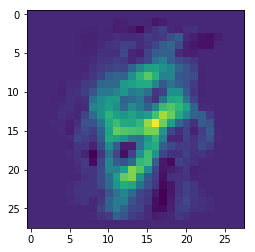

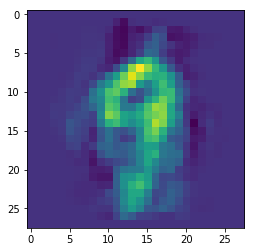

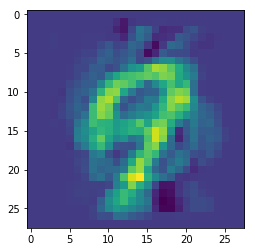

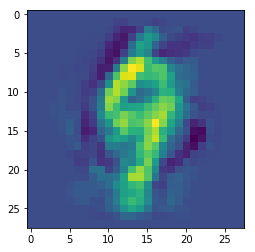

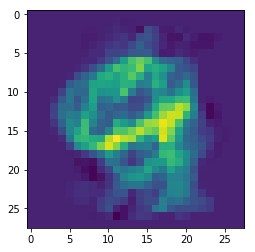

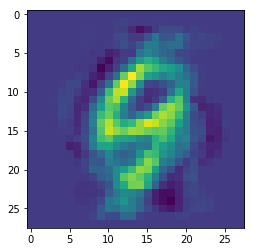

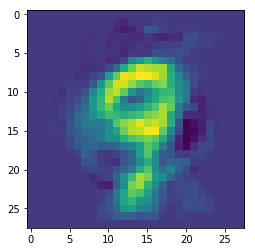

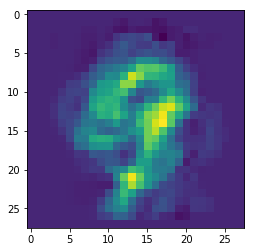

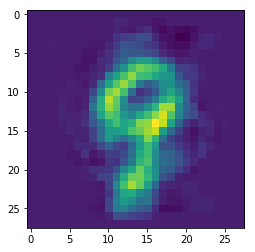

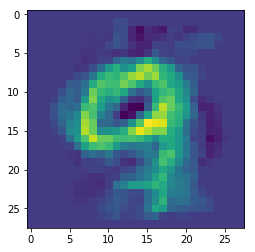

In [50]:
X, X_1 = exercise_1(True)

Desscribe what is happening

# Exercise 2

In [57]:
def exercise_2(plot=False):
	raw = loadmat("69dataset.mat")

	Y = raw['Y']
	X = raw['X']
	X_prior = raw['prior']

	[X, X_mean, X_std] = handcrafted_norm(X)
	[Y, _, _] = handcrafted_norm(Y)
	[X_prior, X_prior_mean, X_prior_std] = handcrafted_norm(X_prior)

	X_train, X_test, Y_train, Y_test = split_data(X, Y, shuffle=False)

	reg = Ridge(alpha=10 ** -6)
	reg.fit(X_train, Y_train)

	sigma_prior = np.dot(X_prior.T, X_prior) / (len(X_prior) - 1)
	sigma_prior = sigma_prior + np.multiply(np.identity(len(sigma_prior)), 10**-6)  # regularization
	sigma = np.multiply(np.identity(reg.coef_.shape[0]), 10**-3)

	if plot:
		plt.imshow(sigma_prior.transpose())
		plt.title(r"The covariance matrix of the $\Sigma_{prior}$")
		plt.show()

	sigma_inv = np.linalg.inv(sigma)
	
	u_post = np.linalg.inv(sigma_prior)
	u_post = u_post + np.dot(np.dot(reg.coef_.T, sigma_inv), reg.coef_)
	u_post = np.linalg.inv(u_post)
	u_post = np.dot(u_post, reg.coef_.T)
	u_post = np.dot(u_post, sigma_inv)

	res = np.array([np.dot(u_post, y) for y in Y_test])
	res = (res * X_std) + X_mean

# 	if plot:
# 		for i in range(len(res)):
# 			show_image(res, i)

	return res


/home/joost/anaconda3/envs/numpy/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


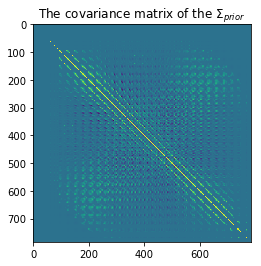

In [58]:
X2 = exercise_2(True)

In the image of the standard deviation, we can see that there is some correlation between the pixels. There is a weird structure because the images are strechted into a line. 

# A comparison of the methods

In [53]:
def compare(X, X1, X2):
	for i in range(X1.shape[0]):
		plt.subplot(131).set_title("Real Image")
		plt.imshow(np.reshape(X[i], newshape=[28, 28]).transpose())
		plt.subplot(132).set_title("Ridge Regression")
		plt.imshow(np.reshape(X1[i], newshape=[28, 28]).transpose())
		plt.subplot(133).set_title("Bayes")
		plt.imshow(np.reshape(X2[i], newshape=[28, 28]).transpose())
		plt.show()

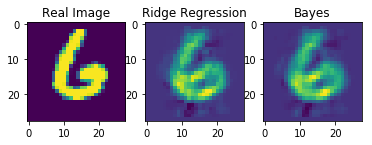

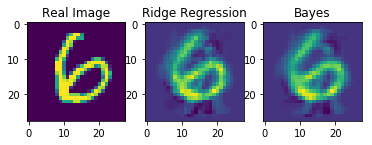

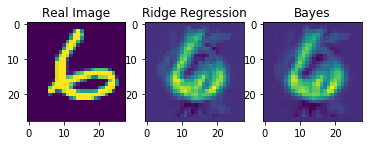

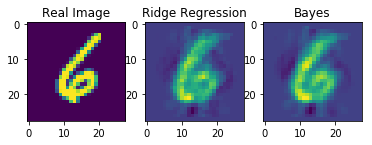

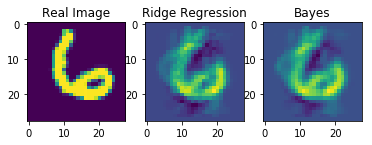

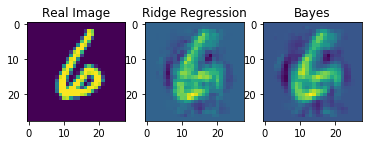

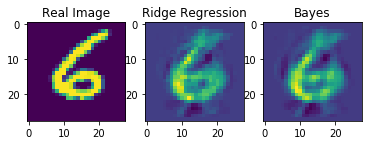

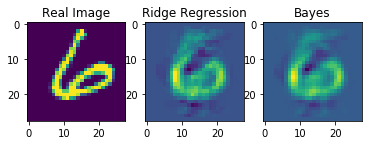

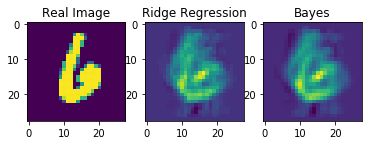

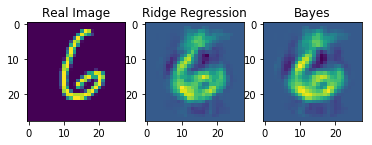

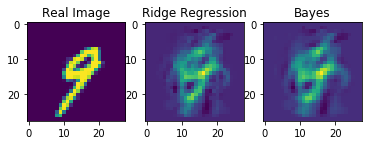

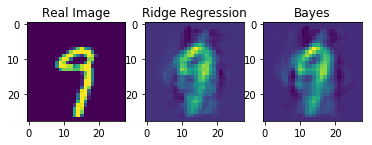

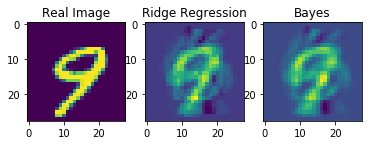

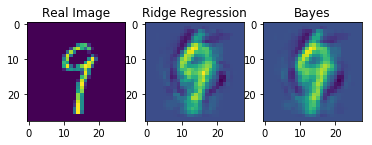

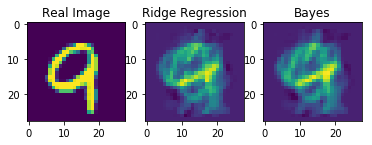

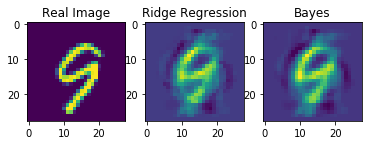

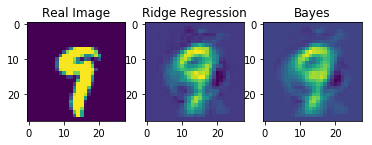

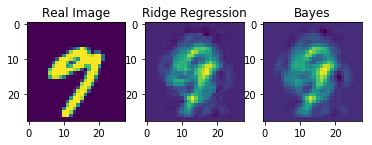

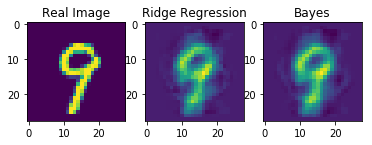

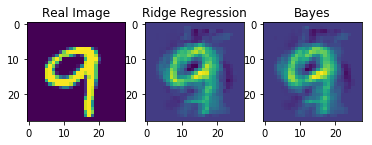

In [54]:
compare(X, X_1, X2)

We can see that both methods have a lot of noise in the predicted images, although we can see what number it should represent. 

There is almost no difference between both predictions, only the darkness of the images is slightly different.

Using convolutional neural networks to detect specific feautures in the brain data, we expect to achieve better results. The problem with this approach is that we need more data than we have available right now.